In [1]:
import numpy as np
import torch
from torchvision import transforms

# Prepare data

In [2]:
N_train, N_test = 200, 20
N_input_feature, N_target_feature = 30, 4
input_train = np.random.rand(N_train, N_input_feature)
target_train = np.random.rand(N_train, N_target_feature)
input_test = np.random.rand(N_test, N_input_feature)
target_test = np.random.rand(N_test, N_target_feature)

In [3]:
class Custom_Dataset(torch.utils.data.Dataset):
    def __init__(self, inpt, target):
        self.inpt = torch.tensor(inpt)
        self.target = torch.tensor(target)

    def __getitem__(self, index):
        inpt, target = self.inpt[index], self.target[index]
        return inpt, target

    def __len__(self):
        return len(self.inpt)

In [4]:
dataset_train = Custom_Dataset(input_train, target_train)
dataset_test = Custom_Dataset(input_test, target_test)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=10, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1, shuffle=False)

# Define Model

In [5]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(30, 15),
            torch.nn.ReLU(),
            torch.nn.Linear(15, 4),
            torch.nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [6]:
model = NeuralNetwork()
loss_mse_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Model training

In [7]:
N_epochs = 300
loss_history = np.zeros(N_epochs)
test_loss_history = np.zeros(N_epochs)
for epoch in range(N_epochs):
    loss_mse_all = 0
    for batch_idx, (inpt, target) in enumerate(dataloader_train):
        inpt, target = inpt.float(), target.float()
        optimizer.zero_grad()
        output = model(inpt)
        loss_mse = loss_mse_fn(output, target)
        loss_mse.mean().backward()
        optimizer.step()
        loss_mse_all += loss_mse.mean()
    loss_mean = loss_mse_all / len(dataloader_train)
    loss_history[epoch] = loss_mean
    
    test_loss_mse_all = 0
    for batch_idx, (inpt, target) in enumerate(dataloader_test):
        inpt, target = inpt.float(), target.float()
        with torch.no_grad():
            output = model(inpt)
            loss_mse = loss_mse_fn(output, target)
        test_loss_mse_all += loss_mse.mean()
    test_loss_mean = test_loss_mse_all / len(dataloader_test)
    test_loss_history[epoch] = test_loss_mean
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch:d}, Training MSE Loss = {loss_mean:.4f}, Test MSE Loss = {test_loss_mean:.4f}.")

Epoch 0, Training MSE Loss = 0.1734, Test MSE Loss = 0.1564.
Epoch 10, Training MSE Loss = 0.1488, Test MSE Loss = 0.1493.
Epoch 20, Training MSE Loss = 0.1440, Test MSE Loss = 0.1545.
Epoch 30, Training MSE Loss = 0.1406, Test MSE Loss = 0.1583.
Epoch 40, Training MSE Loss = 0.1369, Test MSE Loss = 0.1645.
Epoch 50, Training MSE Loss = 0.1345, Test MSE Loss = 0.1682.
Epoch 60, Training MSE Loss = 0.1323, Test MSE Loss = 0.1739.
Epoch 70, Training MSE Loss = 0.0987, Test MSE Loss = 0.1230.
Epoch 80, Training MSE Loss = 0.0626, Test MSE Loss = 0.1160.
Epoch 90, Training MSE Loss = 0.0598, Test MSE Loss = 0.1213.
Epoch 100, Training MSE Loss = 0.0574, Test MSE Loss = 0.1242.
Epoch 110, Training MSE Loss = 0.0548, Test MSE Loss = 0.1295.
Epoch 120, Training MSE Loss = 0.0531, Test MSE Loss = 0.1306.
Epoch 130, Training MSE Loss = 0.0519, Test MSE Loss = 0.1301.
Epoch 140, Training MSE Loss = 0.0500, Test MSE Loss = 0.1381.
Epoch 150, Training MSE Loss = 0.0492, Test MSE Loss = 0.1393.
Epo

In [8]:
import matplotlib.pyplot as plt

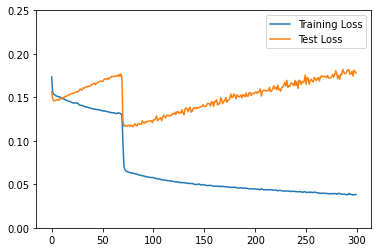

In [9]:
plt.plot(loss_history, label="Training Loss")
plt.plot(test_loss_history, label="Test Loss")
plt.ylim(0, 0.25)
plt.legend()
plt.show()